In [1]:
import numpy as np
import tensorflow #open source used for both ML and DL for computation
from tensorflow.keras.datasets import mnist #mnist dataset
from tensorflow.keras.models import Sequential #it is a plain stack of layers
from tensorflow.keras import layers #A Layer consists of a tensor- in tensor-out computat ion funct ion
from tensorflow.keras.layers import Dense, Flatten #Dense-Dense Layer is the regular deeply connected r
#faltten -used fot flattening the input or change the dimension
from tensorflow.keras.layers import Conv2D #convolutional Layer
from keras.utils import np_utils #used for one-hot encoding
import matplotlib.pyplot as plt   #used for data visualization

In [2]:
#load data
(x_train, y_train), (x_test, y_test)=mnist.load_data () #splitting the mnist data into train and test
print (x_train.shape)  #shape is used for give the dimens ion values #60000-rows 28x28-pixels
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [3]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

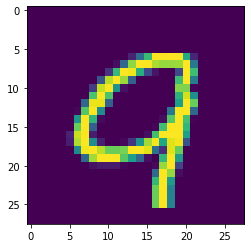

In [4]:
plt.imshow(x_train[3000]) 

In [5]:
np.argmax(y_train[6000])

0

In [6]:
#Reshaping Dataset
#Reshaping to format which CNN expects (batch, height, width, channels)
x_train=x_train.reshape (60000, 28, 28, 1).astype('float32')
x_test=x_test.reshape (10000, 28, 28, 1).astype ('float32')

In [7]:
#Applying One Hot Encoding
number_of_classes = 10  #storing the no of classes in a variable
y_train = np_utils.to_categorical (y_train, number_of_classes) #converts the output in binary format
y_test = np_utils.to_categorical (y_test, number_of_classes)

In [8]:
#Add CNN Layers
#create model
model=Sequential ()
#adding modeL Layer
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(32, (3, 3), activation = 'relu'))
#flatten the dimension of the image
model.add(Flatten())
#output layer with 10 neurons
model.add(Dense(number_of_classes,activation = 'softmax'))

In [9]:

#Compile model
model.compile(loss= 'categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])

In [10]:
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

In [11]:
#Train the model
#fit the model
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 163s 87ms/step - loss: 0.2528 - accuracy: 0.9515 - val_loss: 0.0957 - val_accuracy: 0.9687
Epoch 2/5
1875/1875 [==============================] - 161s 86ms/step - loss: 0.0694 - accuracy: 0.9789 - val_loss: 0.0784 - val_accuracy: 0.9748
Epoch 3/5
1875/1875 [==============================] - 161s 86ms/step - loss: 0.0460 - accuracy: 0.9856 - val_loss: 0.0882 - val_accuracy: 0.9763
Epoch 4/5
1875/1875 [==============================] - 162s 86ms/step - loss: 0.0380 - accuracy: 0.9883 - val_loss: 0.0949 - val_accuracy: 0.9763
Epoch 5/5
1875/1875 [==============================] - 162s 86ms/step - loss: 0.0282 - accuracy: 0.9910 - val_loss: 0.1100 - val_accuracy: 0.9767


In [12]:
#Test The Model
prediction=model.predict(x_test[6000:6001])
print(prediction)

[[1.5586321e-19 2.3611056e-19 1.1069257e-15 3.2597832e-08 6.3453067e-06
  4.9229987e-10 1.5197602e-17 5.6658207e-09 2.3383882e-11 9.9999356e-01]]


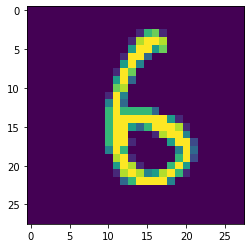

In [13]:
plt.imshow(x_test[3000])

In [14]:
import numpy as np
print(np.argmax(prediction, axis=1)) #printing our Labels from first 4 images

[9]


In [15]:
np.argmax(y_test[6000:6001]) #printing the actual labels

9

In [17]:

# Save the model
model.save('mnistCNN.h5')